# Data Description

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

# Know the Dataset

Let’s now see the type and name of the features:

Sex : This is the gender of the abalone and has categorical value (M, F or I).

Length : The longest measurement of the abalone shell in mm. Continuous numeric value.

Diameter : The measurement of the abalone shell perpendicular to length in mm. Continuous numeric value.

Height : Height of the shell in mm. Continuous numeric value.

Whole Weight : Weight of the abalone in grams. Continuous numeric value.

Shucked Weight : Weight of just the meat in the abalone in grams. Continuous numeric value.

Viscera Weight : Weight of the abalone after bleeding in grams. Continuous numeric value.

Shell Weight : Weight of the abalone after being dried in grams. Continuous numeric value.

Rings : This is the target, that is the feature that we will train the model to predict. As mentioned earlier, we are interested in the age of the abalone and it has been established that number of rings + 1.5 gives the age. Discrete numeric value.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split ,  cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor


# Importing Dataset

In [2]:
ds=pd.read_csv('abalone.csv')
df=pd.DataFrame(ds)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

The columns 'Sex' is categorical, so we will be converting it into numerical form.

This is a Regression problem and our output variable is 'Rings'

In [4]:
sex = {'I':0, 'M':1, 'F':2}

df['Sex'] = df['Sex'].map(sex)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


We can see that the columns 'Sex' is having numerical values now.

# Checking Missing Values

In [5]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

There are no null values in the dataset.

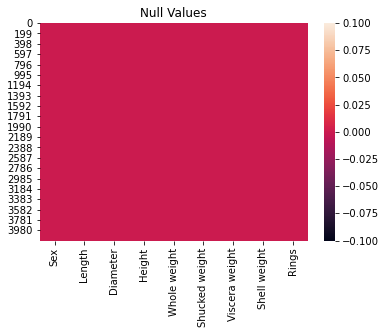

In [6]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

The above plot also indicates that there are no null values present in the dataset. So we do not need to replace NaN values.

In [7]:
df.dtypes

Sex                 int64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

# Analysis of Data

In [8]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.991621,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.796410,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


There is not much variation in the range in the dataset. Also the standard deviation is not high indicating that data is not much scattered.

# Plotting of Data

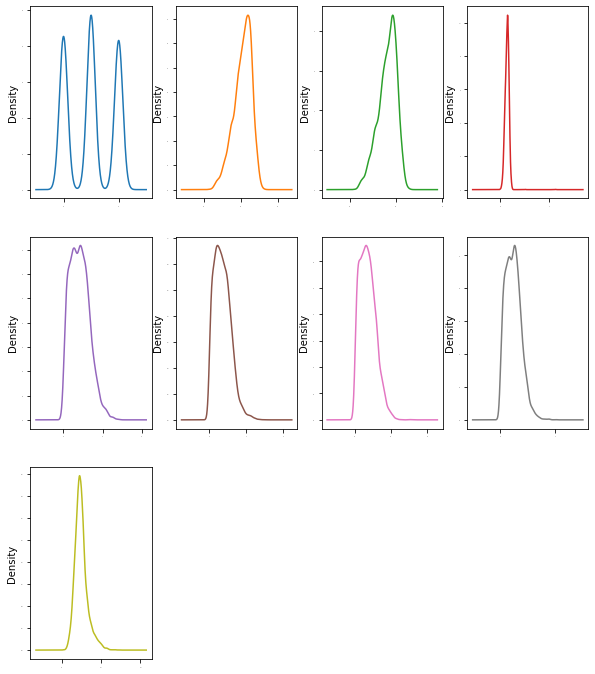

In [9]:
df.plot(kind='density',subplots=True,layout=(3,4),sharex=False, legend=False, fontsize=1,figsize=(10,12))
plt.show()

We can see the skewness in some columns. We will be removing this after removing outliers,if any.

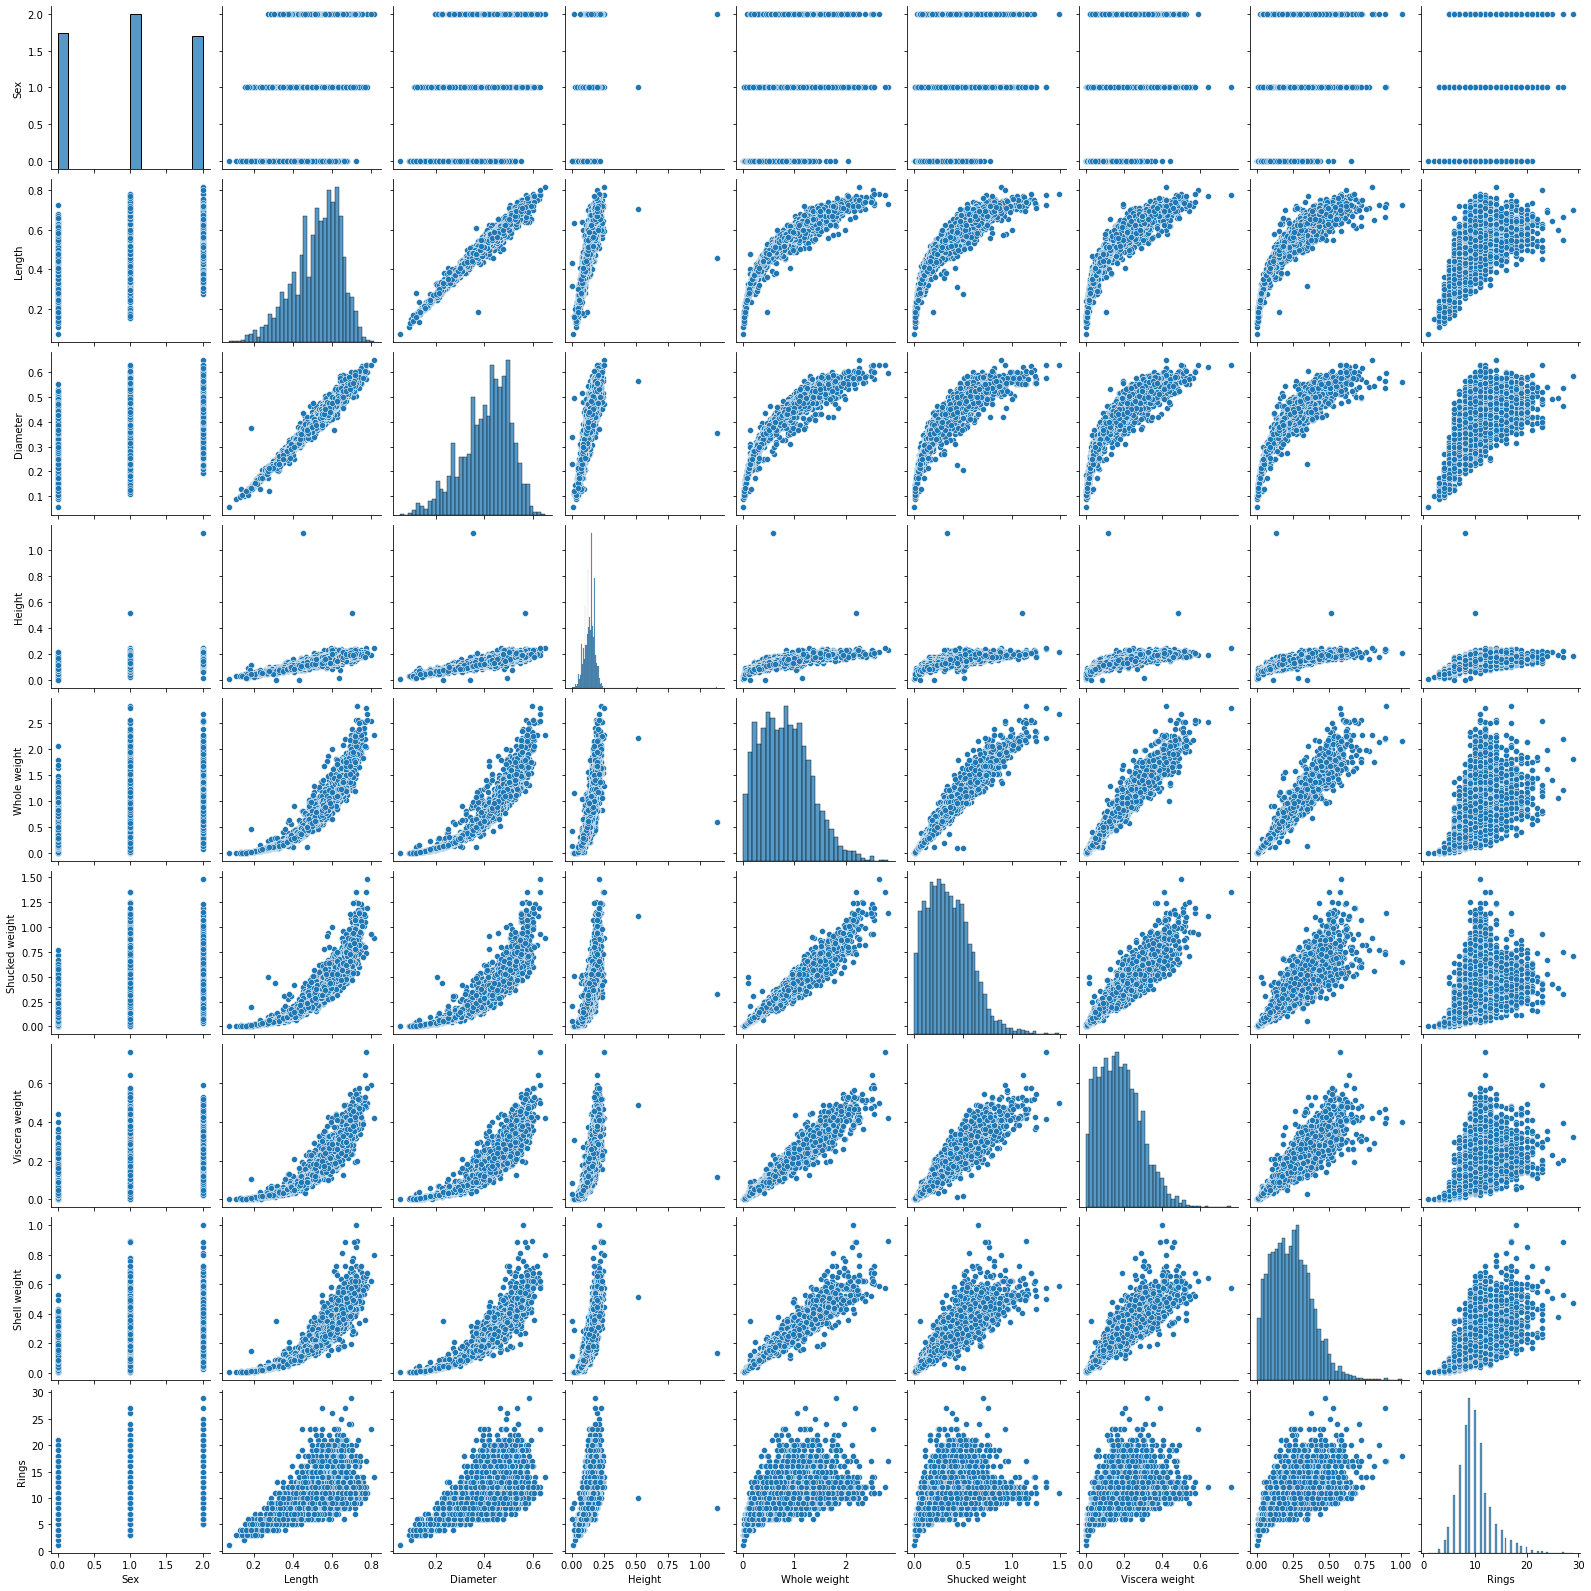

In [10]:
sns.pairplot(df)

# Checking Correlation

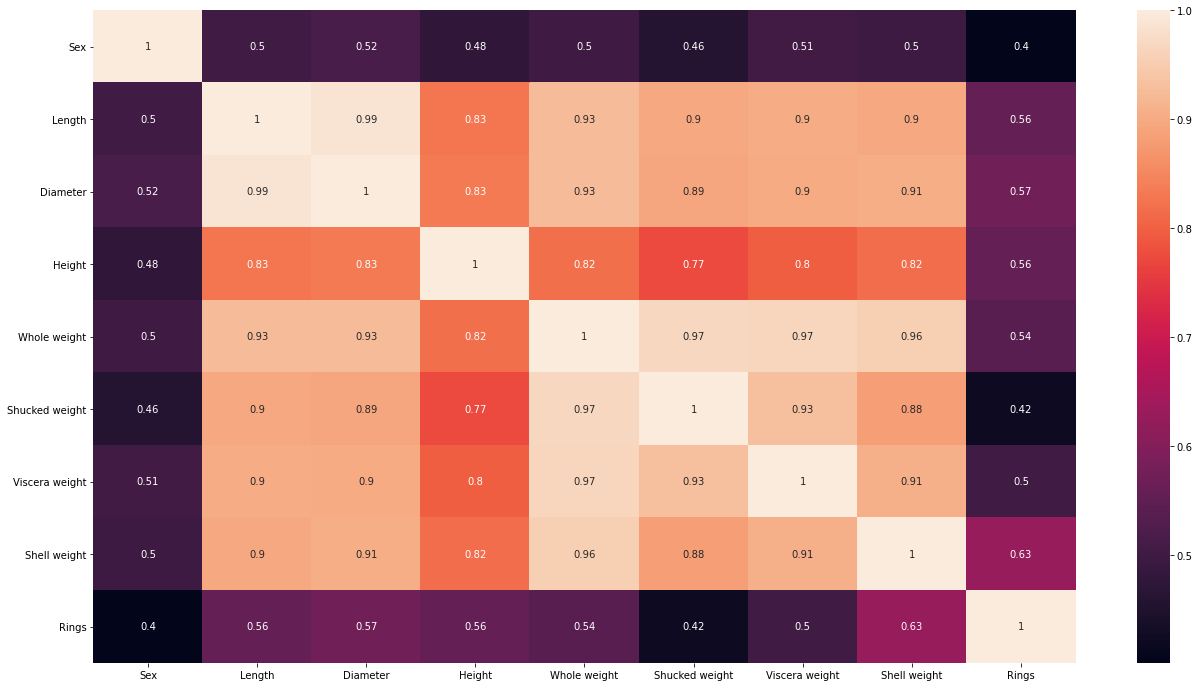

In [11]:
corr_mat=df.corr()
plt.figure(figsize=(22,12))
sns.heatmap(corr_mat,annot=True)
plt.show()

The above matrix shows the correlation between different variables in the dataset including the target variable. The positive values indicates the positive correlation and negative values indicates the negative correlation. The columns with very less correlation with the target variable can be dropped if required. The column 'Shell weight' is the most highly related correlated with the target variable.

To see the relationship between each variable and target variable more clearly, we can follow below step.

In [12]:
corr_matrix=df.corr()
corr_matrix['Rings'].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Sex               0.401445
Name: Rings, dtype: float64

The above result shows more clear picture of how each parameter is related to the target variable. We can now removed the columns with very less correlation with the target variable.

# Checking Outliers

In [13]:
df.dtypes

Sex                 int64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

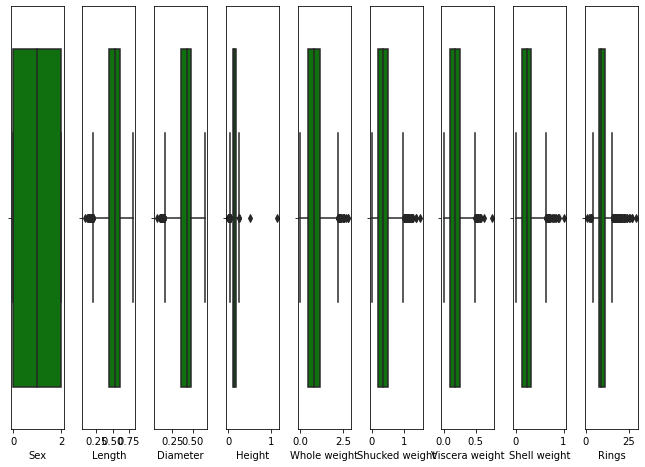

In [14]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

There are outliers present in some of the columns of our dataset. We will be removing outliers with z score value >3.

In [15]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [16]:
df[(z>3).all(axis=1)]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


There are no outliers with z score value >3, so let's not remove the outliers.

# Removing Skewness

In [17]:
x=df.drop('Rings',axis=1)
y=df['Rings']

In [18]:
x.skew()

Sex               0.014980
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
dtype: float64

We can see that there is high skewness in some of the columns. So we will be removing skewness from these columns.

In [19]:
from sklearn.preprocessing import power_transform
x_trans=power_transform(x)
x_trans=pd.DataFrame(x_trans,columns=x.columns)
x_trans

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.095011,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809
1,0.095011,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420
2,1.214297,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262
3,0.095011,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931
4,-1.290806,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528
...,...,...,...,...,...,...,...,...
4172,1.214297,0.249836,0.345636,0.666117,0.241948,0.194158,0.639623,0.193008
4173,0.095011,0.492813,0.230611,-0.064823,0.395706,0.495450,0.433568,0.275215
4174,0.095011,0.593366,0.645191,1.565082,0.777944,0.838137,1.015607,0.598398
4175,1.214297,0.853375,0.769928,0.307083,0.633874,0.858739,0.815184,0.519145


In [20]:
x_trans.skew()

Sex              -0.130467
Length           -0.066669
Diameter         -0.065977
Height           -0.115483
Whole weight     -0.003980
Shucked weight    0.027351
Viscera weight    0.039780
Shell weight      0.023390
dtype: float64

So we have considerably reduced the skewness in our dataset.

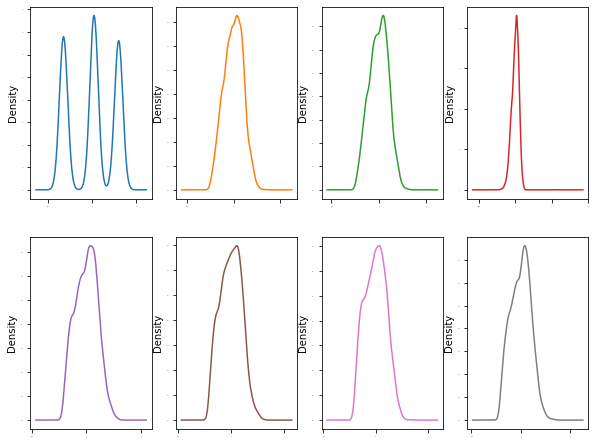

In [21]:
x_trans.plot(kind='density',subplots=True,layout=(3,4),sharex=False, legend=False, fontsize=1,figsize=(10,12))
plt.show()

The above graphs also show that skewness has been considerably reduced in our dataset.

# Finding the best random state

In [22]:
#Finding best random_state
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=LR.score(x_train,y_train)
    acc=acc*100
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)
    

Best accuracy is  55.605134662762225 on random state  165


# Building the model and choosing the best fit model

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_trans, y, train_size=0.8, test_size=0.2, random_state=165)

from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score

model_reg = [RandomForestRegressor, SVR, DecisionTreeRegressor,KNeighborsRegressor]


for model in model_reg:
    m = model()
    print('Model: ',model)
    m.fit(x_train, y_train)
    print('Score: ',m.score(x_train,y_train))
    pred = m.predict(x_test)
    print('Mean Absolute Error: ',mae(y_test, pred))
    scr=-(cross_val_score(m,x,y,cv=5,scoring='neg_mean_squared_error'))
    print('Cross validation score: ',scr.mean())
    

Model:  <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Score:  0.9393059372425511
Mean Absolute Error:  1.64116028708134
Cross validation score:  5.056015824026588
Model:  <class 'sklearn.svm._classes.SVR'>
Score:  0.5705837869019119
Mean Absolute Error:  1.5650175617195206
Cross validation score:  5.616811623797188
Model:  <class 'sklearn.tree._classes.DecisionTreeRegressor'>
Score:  1.0
Mean Absolute Error:  2.2607655502392343
Cross validation score:  9.345349110391657
Model:  <class 'sklearn.neighbors._regression.KNeighborsRegressor'>
Score:  0.6714581208643345
Mean Absolute Error:  1.6992822966507175
Cross validation score:  5.492769824943415


We can say that Decision Tree is giving us maximum score of 1 but this is also giving slightly higher mae of 2.28 as compared to Random Forest Regressor having score of 0.93 and mae of 1.64. 

We have also checked for the overfitting using cross validation score. So the difference between accuracy and cross validation score is also minimum in case of Random Forest Classifier. So Random Forest Regressor can be considered as best fit for our case. 

# Saving our best fit model

In [24]:
rf = RandomForestRegressor()
rf.fit(x_train , y_train)
rf.score(x_train , y_train)

0.9394250641352098

In [25]:
y_pred = rf.predict(x_test)

In [26]:
print("Predicted result: ",y_pred)
print("Actual result : ", y_test)

Predicted result:  [10.76 11.47  7.34  6.6  10.36 10.11 10.41  5.68  8.75  8.57 11.26 11.76
  9.43  8.61  8.97  6.77 10.37 10.04 11.28 14.05  7.55 10.68  9.1   5.83
 12.42 11.95 10.88  9.6   9.1   8.99 12.39 10.5  10.48  5.3  19.45  9.54
  8.4  10.69 13.72  9.1   8.61 11.24  6.92  8.93  8.61 10.42 10.82  9.2
  7.44  8.98  9.04  9.27 10.    9.6   9.54 11.66 11.5   7.76  8.12 12.47
  9.03  7.84 12.82  7.19 11.57 16.18  8.24 12.43 10.71 10.63 10.38  6.04
  8.09 15.46 11.69 10.47 14.29 11.61 13.24  7.49 10.67  9.16  4.92 10.17
  6.5  10.61  6.63  8.54  7.28  8.45  7.12 10.04 10.03  9.04  5.66 16.49
  8.78 10.41 13.14 14.2   9.74 12.88 11.89 10.5  11.82  8.    9.5   9.58
  9.54 11.61 11.48 10.97 13.46  9.15 12.3   7.17 12.07  9.19 11.41 12.18
 10.42  8.09  5.81 11.42  6.33 10.14 11.07  6.02 10.7   9.09  9.74 12.04
  8.03  8.71  6.38  9.97 10.66  9.13  9.15 10.29  9.23 13.88 10.92  8.65
  8.11 11.34  8.5  10.66 10.5   7.04 11.69  8.97  7.85  8.72 10.41  7.73
  7.42  8.1   7.63  6.86 10.12  7

In [27]:
print("Error : ")

# MAE is the sum of absolute differences between our target and predicted variables. 
# So it measures the average magnitude of errors in a set of predictions, without considering their directions. 
print('Mean absolute error : ', mean_absolute_error(y_test,y_pred))

# MSE(Mean Squared Error) is the sum of squared distances between our target variable and predicted values.
print('Mean squared error : ', mean_squared_error(y_test,y_pred))

# Residuals are a measure of how far from the regression line data points are
print('Root mean squared error : ', np.sqrt(mean_squared_error(y_test,y_pred)))

Error : 
Mean absolute error :  1.6415789473684212
Mean squared error :  5.505201674641148
Root mean squared error :  2.3463166185835083


We can see the model predictions and error rate in our predicted model.

In [28]:
#r2 score --> co-efficient of determination' is the proportion of the variance in the dependent variable that is predictable 
#from the independent variable(s). i.e. Change in y when x is being changed
from sklearn.metrics import r2_score
print(r2_score(y_test, pred))

0.4294652107084135


Higher the r2 score, better the performance of the model.

In [29]:
from sklearn.model_selection import GridSearchCV

In [33]:
GCV.best_params_ #printing the best parameters found by GridSearchCV

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [45]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [46]:
GCV.score(x_train,y_train)

0.7748018233795362

# Saving the model

In [36]:
import joblib
joblib.dump(rf,'Abalone.obj')

['Abalone.obj']

In [47]:
rf = RandomForestRegressor(bootstrap=True,max_depth=80,max_features= 3,min_samples_leaf=3,min_samples_split=10,n_estimators=100)
rf.fit(x_train , y_train)
rf.score(x_train , y_train)

0.7948434498820156